EDA & data visualization - Airbnb Listing

1. Import all libraries
2. Load the Dataset
3. EDA - no of rows & columns etc..
4. Data Cleaning - Identify dups, null values
5. Data Analysis using Pandas, Matplotlib, Seaborn

In [1]:
%pip install numpy pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip list

Package                   Version
------------------------- --------------
anyio                     4.6.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     24.2.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blinker                   1.9.0
certifi                   2024.8.30
cffi                      1.17.1
charset-normalizer        3.3.2
click                     8.2.1
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.3.0
cycler                    0.12.1
dash                      3.0.4
dash-html-components      2.0.0
dash_renderer             1.9.1
debugpy                   1.8.6
decorator                 5.1.1
defusedxml                0.7.1
et-xmlfile                1.1.0
executing                 2.1.0
fastjsonschema            2.20.0
Flask            

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
%matplotlib inline

Task 2 : Loading Dataset

In [5]:
data = pd.read_csv(r"C:/Users/jesee/Downloads/Airbnb datasets.csv", encoding_errors='ignore', engine='python')

Initial Exploration

In [7]:
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1.312228e+06,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,20/12/15,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified
1,4.527754e+07,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,01/05/23,0.24,139.0,364.0,2.0,No License,4.67,2,1,1
2,9.710000e+17,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,18/12/23,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1
3,3.857863e+06,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,17/09/23,1.38,2.0,363.0,12.0,No License,4.64,1,1,1
4,4.089661e+07,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,03/12/23,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1


In [8]:
data.tail(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
20765,2.473690e+07,Rental unit in New York · ★4.75 · 1 bedroom · ...,186680487,Henry D,Manhattan,Lower East Side,40.711380,-73.991560,Private room,45.0,...,29/09/23,1.81,1.0,157.0,12.0,No License,4.75,1,1,1
20766,2.835711e+06,Rental unit in New York · ★4.46 · 1 bedroom · ...,3237504,Aspen,Manhattan,Greenwich Village,40.730580,-74.000700,Entire home/apt,105.0,...,01/07/23,0.48,1.0,0.0,1.0,No License,4.46,1,2,1
20767,5.182527e+07,Rental unit in New York · ★4.93 · 1 bedroom · ...,304317395,Jeff,Manhattan,Hell's Kitchen,40.757350,-73.993430,Entire home/apt,299.0,...,08/12/23,2.09,1.0,0.0,27.0,No License,4.93,1,1,1
20768,7.830000e+17,Rental unit in New York · ★5.0 · 1 bedroom · 1...,163083101,Marissa,Manhattan,Chinatown,40.713750,-73.991470,Entire home/apt,115.0,...,17/09/23,0.91,1.0,363.0,7.0,No License,5,1,1,1
20769,5.660000e+17,Rental unit in Queens · ★4.89 · 1 bedroom · 1 ...,93827372,Glenroy,Queens,Rosedale,40.658874,-73.728651,Private room,102.0,...,10/12/23,4.50,1.0,0.0,62.0,OSE-STRREG-0000513,4.89,1,1,1


In [6]:
data.shape #find no.of rows & columns 

(20770, 22)

In [13]:
data.info #find datatypes & null values

<bound method DataFrame.info of                  id                                               name  \
0      1.312228e+06         Rental unit in Brooklyn · ★5.0 · 1 bedroom   
1      4.527754e+07  Rental unit in New York · ★4.67 · 2 bedrooms ·...   
2      9.710000e+17  Rental unit in New York · ★4.17 · 1 bedroom · ...   
3      3.857863e+06  Rental unit in New York · ★4.64 · 1 bedroom · ...   
4      4.089661e+07  Condo in New York · ★4.91 · Studio · 1 bed · 1...   
...             ...                                                ...   
20765  2.473690e+07  Rental unit in New York · ★4.75 · 1 bedroom · ...   
20766  2.835711e+06  Rental unit in New York · ★4.46 · 1 bedroom · ...   
20767  5.182527e+07  Rental unit in New York · ★4.93 · 1 bedroom · ...   
20768  7.830000e+17  Rental unit in New York · ★5.0 · 1 bedroom · 1...   
20769  5.660000e+17  Rental unit in Queens · ★4.89 · 1 bedroom · 1 ...   

         host_id           host_name neighbourhood_group       neighbourhood  \

In [17]:
print(data.index)

column_names = list(data.columns) # lists Column names

column_dtypes = list(data.dtypes) # Data types

non_null_counts = list(data.count()) # Number of non-null values per column

null_counts = list(data.isnull().sum()) # Null counts (if needed)

# Combine as a list of tuples (column name, dtype, non-null count, null count)
info_list = list(zip(column_names, column_dtypes, non_null_counts, null_counts))

# Display with proper formatting
for col_name, dtype, non_null, null in info_list:
    print(f"{col_name:30} | {str(dtype):10} | Non-Null: {non_null:<6} | Null: {null}")

RangeIndex(start=0, stop=20770, step=1)
id                             | float64    | Non-Null: 20770  | Null: 0
name                           | object     | Non-Null: 20770  | Null: 0
host_id                        | int64      | Non-Null: 20770  | Null: 0
host_name                      | object     | Non-Null: 20770  | Null: 0
neighbourhood_group            | object     | Non-Null: 20770  | Null: 0
neighbourhood                  | object     | Non-Null: 20763  | Null: 7
latitude                       | float64    | Non-Null: 20763  | Null: 7
longitude                      | float64    | Non-Null: 20763  | Null: 7
room_type                      | object     | Non-Null: 20763  | Null: 7
price                          | float64    | Non-Null: 20736  | Null: 34
minimum_nights                 | float64    | Non-Null: 20763  | Null: 7
number_of_reviews              | float64    | Non-Null: 20763  | Null: 7
last_review                    | object     | Non-Null: 20763  | Null: 7
reviews_pe

In [18]:
data.describe() #Statistical report

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,2.077000e+04,2.077000e+04,20763.000000,20763.000000,20736.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20770.000000
mean,3.033858e+17,1.749049e+08,40.726821,-73.939179,187.714940,28.558493,42.610605,1.257589,18.866686,206.067957,10.848962,1.723592
std,3.901221e+17,1.725657e+08,0.060293,0.061403,1023.245124,33.532697,73.523401,1.904472,70.921443,135.077259,21.354876,1.211993
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,2.707260e+07,2.041184e+07,40.684159,-73.980755,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000
50%,4.992852e+07,1.086990e+08,40.722890,-73.949597,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,1.000000
75%,7.220000e+17,3.143997e+08,40.763106,-73.917475,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000
max,1.050000e+18,5.504035e+08,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,42.000000


Task 4: Data cleaning

In [28]:
print(data.isnull().sum()) #data.isnull().sum() #finding missing values in each column

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
dtype: int64


In [39]:
data.dropna(inplace=True) #drop rows with missing values
print(data.isnull().sum())
# print(data.head())
# data.fillna for filling with values

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
dtype: int64


In [38]:
print("After drop:", data.shape)

After drop: (20736, 22)


In [40]:
#data = data.dropna(subset=['col1', 'col2']) drops specific columns
#data = data.dropna(axis=1) Drop columns with missing values:
#data = data.dropna(how='all') Drop rows where all values are missing

In [45]:
data.duplicated().sum() #find duplicates shows 12 records with duplicates
data[data.duplicated()] #finds al duplicate records

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
6,4.527754e+07,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,01/05/23,0.24,139.0,364.0,2.0,No License,4.67,2,1,1
7,9.710000e+17,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,18/12/23,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1
8,3.857863e+06,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,17/09/23,1.38,2.0,363.0,12.0,No License,4.64,1,1,1
9,4.089661e+07,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,03/12/23,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1
10,4.958498e+07,Rental unit in New York · ★5.0 · 1 bedroom · 1...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.759950,-73.992960,Entire home/apt,115.0,...,29/07/23,0.16,139.0,276.0,2.0,No License,5,1,1,1
20736,7.990000e+17,Rental unit in New York · 2 bedrooms · 2 beds ...,224733902,CozySuites Copake,Manhattan,Upper East Side,40.768970,-73.957592,Entire home/apt,153.0,...,15/09/23,0.41,8.0,308.0,2.0,No License,No rating,2,2,2
20737,5.930000e+17,Rental unit in New York · ★4.79 · 2 bedrooms ·...,23219783,Rob,Manhattan,West Village,40.730220,-74.002910,Entire home/apt,175.0,...,22/11/23,2.03,4.0,129.0,25.0,No License,4.79,2,2,1
20738,9.230000e+17,Loft in New York · ★4.33 · 1 bedroom · 2 beds ...,520265731,Rodrigo,Manhattan,Greenwich Village,40.728390,-73.999540,Entire home/apt,156.0,...,02/01/24,2.60,1.0,356.0,9.0,Exempt,4.33,1,2,1
20739,1.336161e+07,Rental unit in New York · ★4.89 · 2 bedrooms ·...,8961407,Jamie,Manhattan,Harlem,40.805700,-73.946250,Entire home/apt,397.0,...,08/09/23,1.08,3.0,274.0,3.0,No License,4.89,2,2,1
20740,5.119566e+07,Rental unit in New York · Studio · 1 bed · 1 bath,51501835,Jeniffer,Manhattan,Chinatown,40.718360,-73.995850,Entire home/apt,100.0,...,25/05/23,0.08,139.0,306.0,1.0,No License,No rating,Studio,1,1


In [47]:
data.drop_duplicates(inplace=True) #deleteing all duplicate records
data.duplicated().sum() 

np.int64(0)

In [49]:
data.dtypes #find datatypes of columns

id                                float64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
dtype: object

In [53]:
data['id'] = data['id'].astype(object) #type casting : changing id datatype to object
data['host_id'] = data['host_id'].astype(object)
data.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
dtype: object

Task 5 - EDA: DATA ANALYSIS

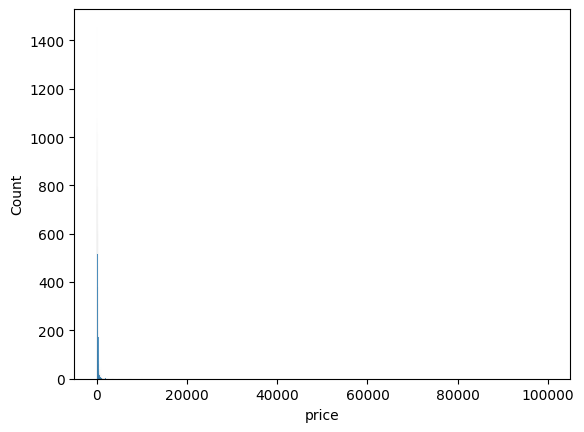

In [55]:
#univariate analysis, analysis of single columns and their data distribution, 
#while bivariate is comapring effect of one column to another (one variable to another)
sns.histplot(data=data, x='price') #price-distribution 
plt.show()

<Axes: xlabel='price'>

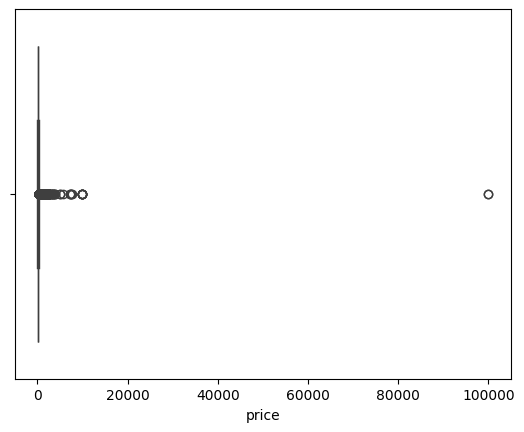

In [56]:
sns.boxplot(data=data, x='price')#finding outliers in price, found around 100000

<Axes: xlabel='price'>

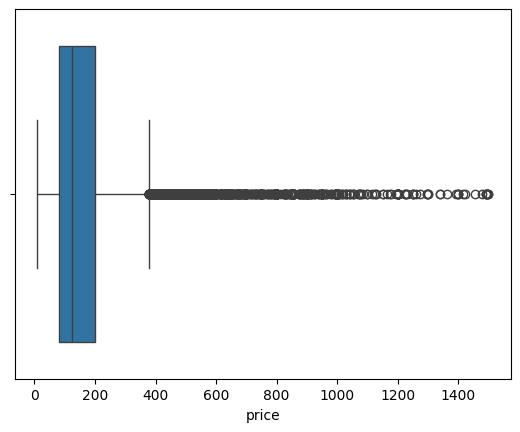

In [58]:
df= data[data['price'] < 1500]
sns.boxplot(data=df, x='price')

Text(0, 0.5, 'Frequency')

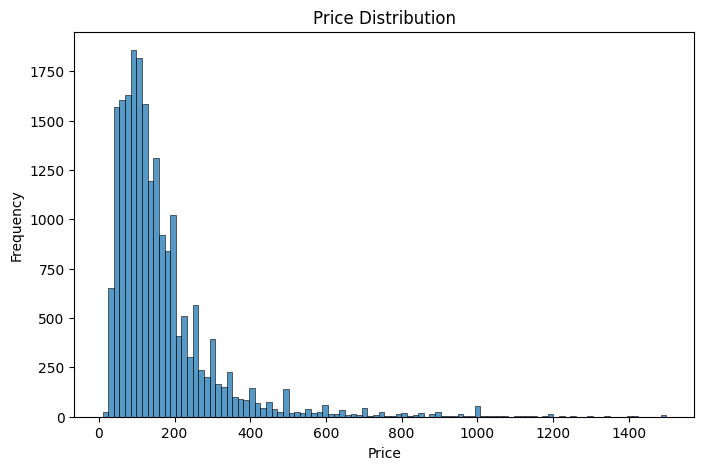

In [69]:
plt.figure(figsize =(8,5)) #this chart mentions the price distribution part of univariate analysis (single variable)
sns.histplot(data=df, x='price', bins=100)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

In [65]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths'],
      dtype='object')

In [66]:
print(df.columns.tolist()) 

['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'license', 'rating', 'bedrooms', 'beds', 'baths']


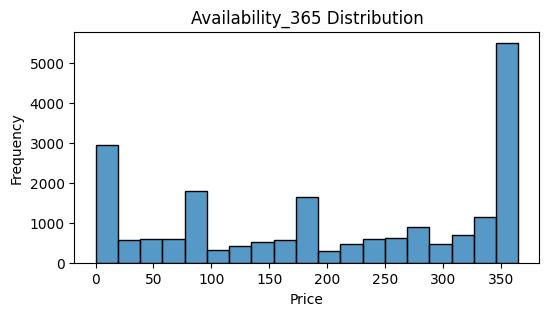

In [72]:
plt.figure(figsize =(6,3)) #this chart mentions the price distribution part of univariate analysis (single variable)
sns.histplot(data=df, x='availability_365')
plt.title('Availability_365 Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [76]:
#groupby neighborhood & price
df.groupby(by='neighbourhood_group')['price'].mean()

neighbourhood_group
Bronx            107.990506
Brooklyn         155.138317
Manhattan        204.146014
Queens           121.681939
Staten Island    118.780069
Name: price, dtype: float64

In [78]:
#feature_eng, the process of creating, transforming, or selecting input variables ("features") to improve the performance of a machine learning model.
#df['price per bed'] = df['price']/df['beds']
df.loc[:, 'price per bed'] = df['price'] / df['beds']
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths,price per bed
0,1312228.0,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified,55.0
1,45277537.0,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,0.24,139.0,364.0,2.0,No License,4.67,2,1,1,144.0
2,971000000000000000.0,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1,93.5
3,3857863.0,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,1.38,2.0,363.0,12.0,No License,4.64,1,1,1,120.0
4,40896611.0,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1,85.0


In [80]:
df.groupby(by='neighbourhood_group')['price per bed'].mean() #average price per bed

neighbourhood_group
Bronx             74.713639
Brooklyn          99.788493
Manhattan        138.708057
Queens            76.336210
Staten Island     67.728101
Name: price per bed, dtype: float64

In [93]:
#bivariate analysis (one varibale relationship with another & its effect)
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths', 'price per bed'],
      dtype='object')

<Axes: title={'center': 'Impact of price on Neighborhood'}, xlabel='neighbourhood_group', ylabel='price'>

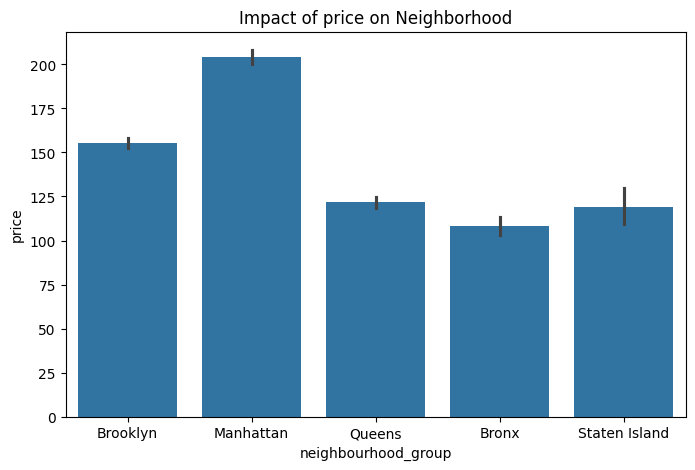

In [120]:
#how price is dependent on neighborhood
plt.figure(figsize=(8,5))
plt.title('Impact of price on Neighborhood')
sns.barplot(data=df, x='neighbourhood_group', y='price')

<Axes: title={'center': 'Room prices in various neighborhood'}, xlabel='neighbourhood_group', ylabel='price'>

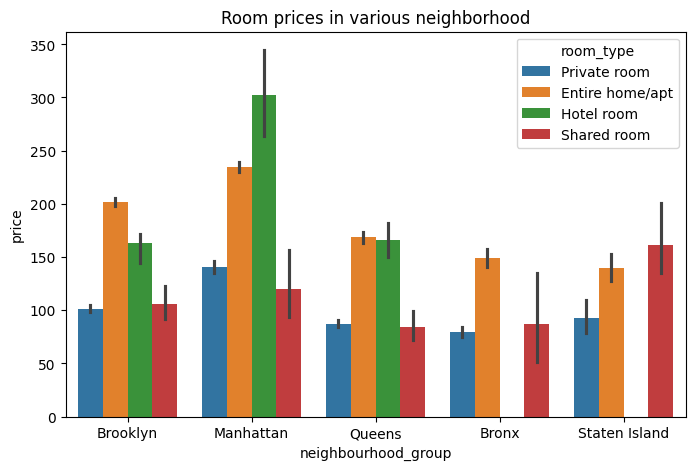

In [121]:
plt.figure(figsize=(8,5))
plt.title('Room prices in various neighborhood')
sns.barplot(data=df, x='neighbourhood_group', y='price', hue='room_type') #price of room_types in various neighborhood

<Axes: title={'center': 'Locality & Review dependency'}, xlabel='number_of_reviews', ylabel='price'>

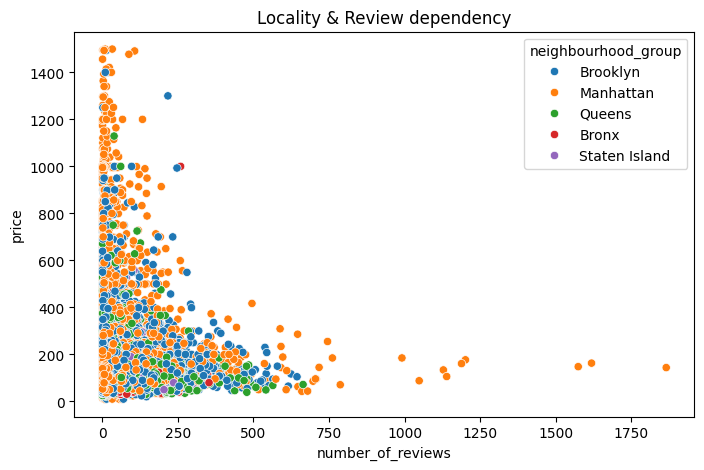

In [100]:
plt.figure(figsize=(8,5))
plt.title('Locality & Review dependency')
sns.scatterplot(data=df, x='number_of_reviews', y='price', hue='neighbourhood_group') 

In [101]:
df.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
price per bed                     float64
dtype: object

A pairplot is a type of multi-plot in Seaborn (a Python visualization library) that shows pairwise relationships between multiple variables in a dataset — all in one grid of plots.

What It Does:
For numerical columns, it plots:
Scatter plots for each pair of variables
Histograms (or KDEs) along the diagonals to show distributions

When to Use It:
To quickly explore relationships between numeric variables
To detect patterns, trends, or clusters
To check if variables are linearly correlated

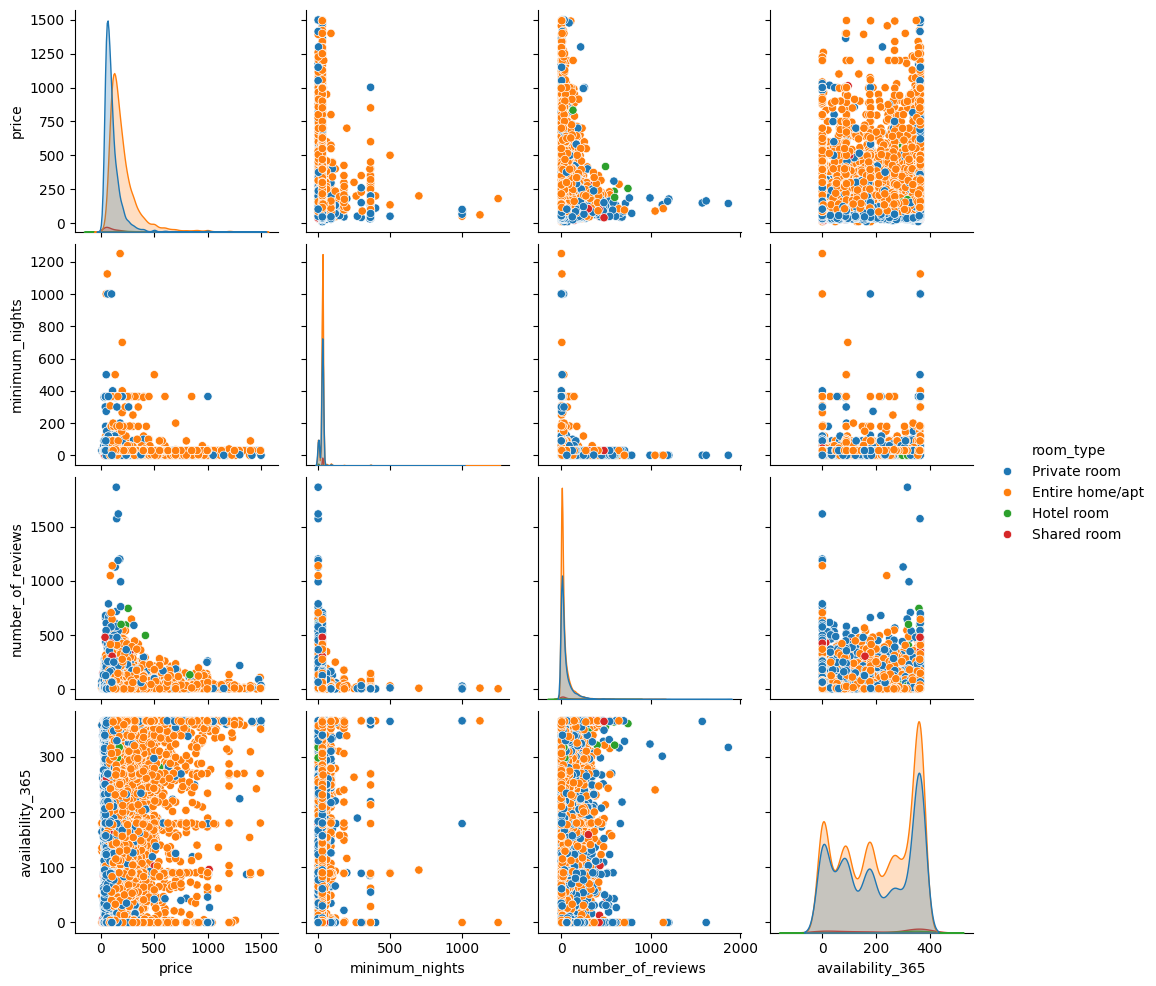

In [103]:
sns.pairplot(data=df, vars=['price', 'minimum_nights', 'number_of_reviews', 'availability_365'], hue='room_type')

<Axes: title={'center': 'Geographical distribution of Airbnb Listings'}, xlabel='longitude', ylabel='latitude'>

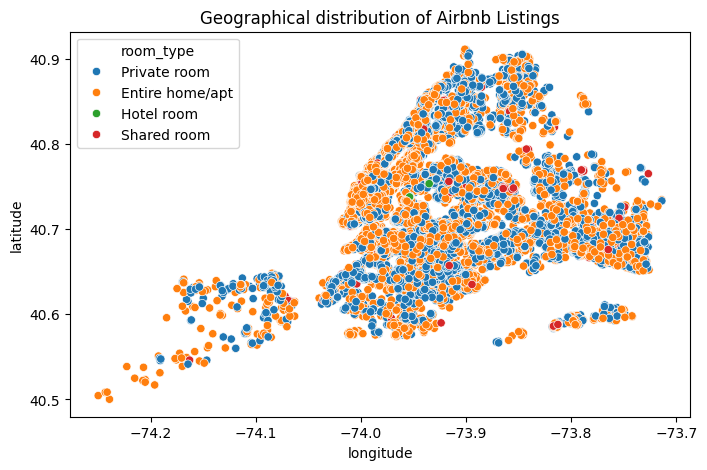

In [107]:
#geo distribution
plt.figure(figsize=(8,5))
plt.title('Geographical distribution of Airbnb Listings')
sns.scatterplot(data= df, x= 'longitude', y='latitude', hue='room_type')

In [108]:
df.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
price per bed                     float64
dtype: object

The .corr() function in Pandas calculates the correlation coefficient between numerical columns in a DataFrame.

What It Measures:
Correlation shows the linear relationship between two variables:
+1 → perfect positive correlation
-1 → perfect negative correlation
0 → no linear correlation

When to Use .corr():
To check relationships between variables (e.g., does Age increase with Salary?)
To detect multicollinearity in features before modeling
To identify redundant features

In [114]:
#heatmap - correlation of one variable with others for numerical column
corr = df[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'beds']].corr()
corr

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,beds
latitude,1.000000,0.047369,0.012686,0.004590,-0.047953,-0.041673,-0.005941,-0.071753
longitude,0.047369,1.000000,-0.193728,0.023890,0.004820,0.041720,0.063523,0.041832
price,0.012686,-0.193728,1.000000,-0.044635,-0.043533,-0.012775,0.048036,0.415278
minimum_nights,0.004590,0.023890,-0.044635,1.000000,-0.059049,-0.122509,0.035466,-0.025852
number_of_reviews,-0.047953,0.004820,-0.043533,-0.059049,1.000000,0.631005,-0.049656,0.040071
reviews_per_month,-0.041673,0.041720,-0.012775,-0.122509,0.631005,1.000000,-0.040116,0.053496
availability_365,-0.005941,0.063523,0.048036,0.035466,-0.049656,-0.040116,1.000000,0.065985
beds,-0.071753,0.041832,0.415278,-0.025852,0.040071,0.053496,0.065985,1.000000


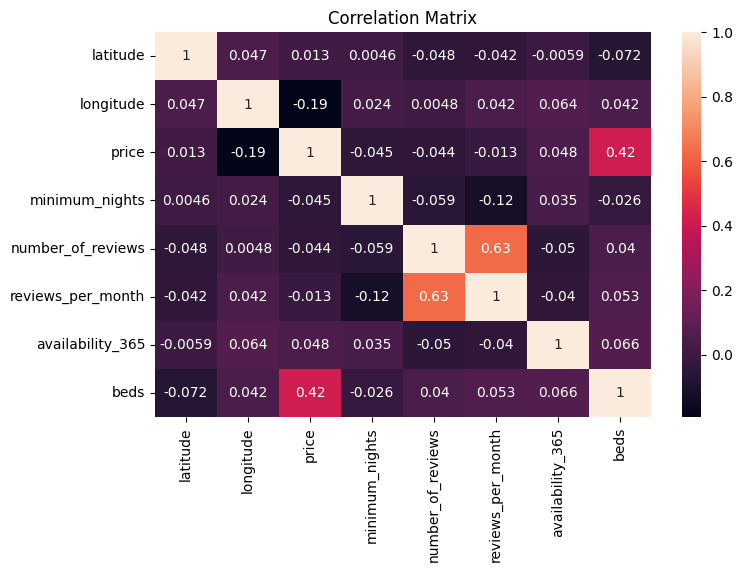

In [119]:
plt.figure(figsize=(8,5))
sns.heatmap(data=corr, annot=True) #, cmap='coolwarm'
plt.title('Correlation Matrix')
plt.show()

In [126]:
#Filter for listings with high minimum nights (e.g., >30)
high_min_nights = df[df["minimum_nights"] > 30]

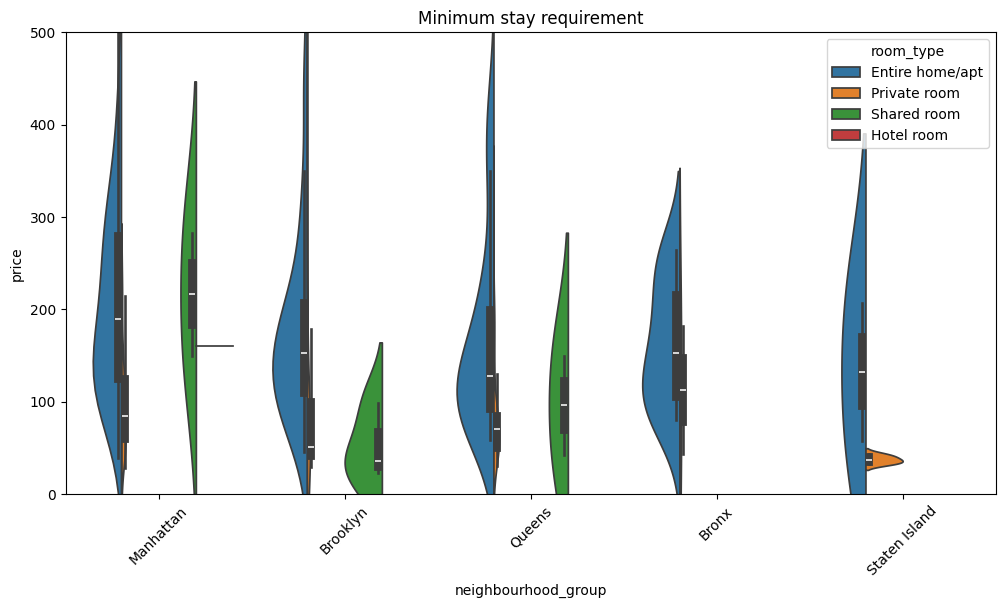

In [127]:
plt.figure(figsize=(12, 6))
plt.title('Minimum stay requirement')
sns.violinplot(data=high_min_nights, x="neighbourhood_group", y="price", hue="room_type", split=True)
#plt.title("Price Distribution (Violin) by Neighbourhood Group and Room Type")
plt.ylim(0, 500)  # optional to trim outlier noise
plt.xticks(rotation=45)
plt.show()

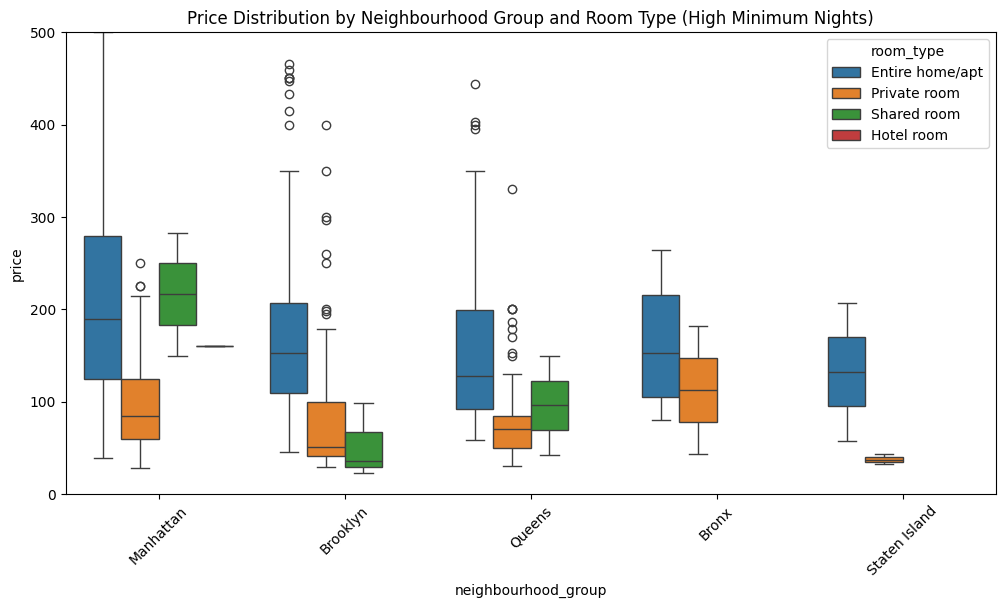

In [128]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=high_min_nights, x="neighbourhood_group", y="price", hue="room_type")
plt.title("Price Distribution by Neighbourhood Group and Room Type (High Minimum Nights)")
plt.ylim(0, 500)  # optional to cut outliers
plt.xticks(rotation=45)
plt.show()

In [129]:
# Group by neighbourhood and aggregate guest activity
neighbourhood_traffic = df.groupby("neighbourhood")[["number_of_reviews", "reviews_per_month", "number_of_reviews_ltm"]].sum()

# Sort by number_of_reviews or reviews_per_month (your choice of metric)
top_neighbourhoods = neighbourhood_traffic.sort_values(by="number_of_reviews", ascending=False).head(10)

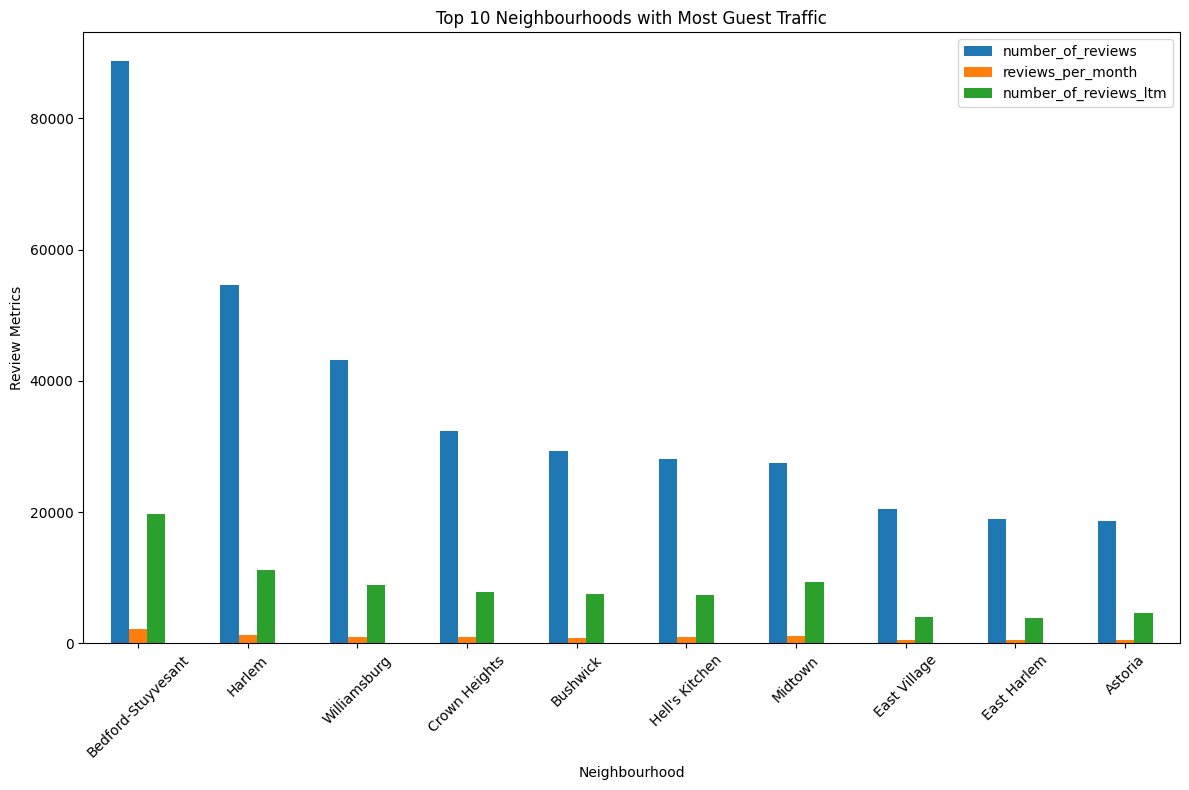

In [131]:
top_neighbourhoods.plot(kind="bar", figsize=(12,8))
plt.title("Top 10 Neighbourhoods with Most Guest Traffic")
plt.ylabel("Review Metrics")
plt.xlabel("Neighbourhood")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [133]:
# Group by host to sum their total listings
top_hosts = df.groupby(["host_id", "host_name"])["calculated_host_listings_count"].sum().reset_index()

# Sort in descending order to get top 10
top_hosts = top_hosts.sort_values(by="calculated_host_listings_count", ascending=False).head(10)
top_hosts

,host_id,host_name,calculated_host_listings_count
6694,107434423,Blueground,76291.0
7643,162280872,Urban Furnished,37376.0
1380,3223938,Eugene,31806.0
3506,19303369,Hiroki,23229.0
5325,51501835,Jeniffer,17931.0
8138,200239515,Shogo,17430.0
5629,61391963,Stay With Vibe,15029.0
8184,204704622,Momoyo,14396.0
3801,22541573,Furnished Quarters,9840.0
7229,137358866,Kaz,7440.0


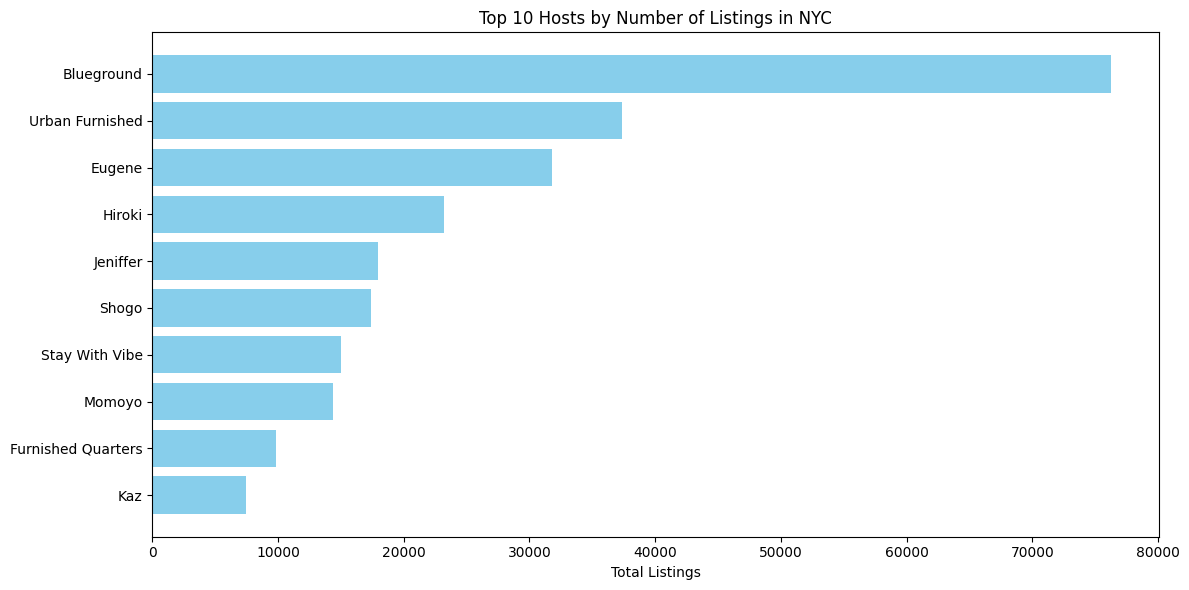

In [137]:
plt.figure(figsize=(12, 6))
plt.barh(top_hosts["host_name"], top_hosts["calculated_host_listings_count"], color='skyblue')
plt.xlabel("Total Listings")
plt.title("Top 10 Hosts by Number of Listings in NYC")
plt.gca().invert_yaxis()  # Largest bar at top
plt.tight_layout()
plt.show()

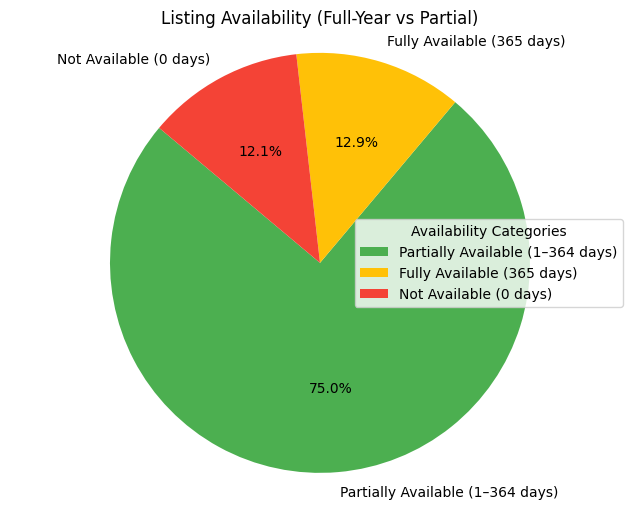

In [148]:
#function categorizing each listing based on how many days it is available
def availability_category(x):
    if x == 365:
        return "Fully Available (365 days)"
    elif x == 0:
        return "Not Available (0 days)"
    else:
        return "Partially Available (1–364 days)"

df["availability_category"] = df["availability_365"].apply(availability_category)

# Count listings in each category
availability_counts = df["availability_category"].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(availability_counts, labels=availability_counts.index, autopct="%1.1f%%", startangle=140, colors=colors)
plt.title("Listing Availability (Full-Year vs Partial)")
plt.axis("equal")  # Equal aspect ratio for a proper circle
plt.legend( availability_counts.index, title="Availability Categories", loc="best")
plt.show()